## About Dataset
It is taken from Kaggle. It contains unemployment data in all states of India. This data was collected at the end of every month starting from May 2019 till June 2020. 

Dataset: https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

## Problem Statement
Lockdown was announced in India in late March 2020. The aim of this project is to analyse the dataset to know how the lockdown affects employment opportunities and how the unemployment rate increases during COVID-19.

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
df = pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


#### Columns Description:
|Feature|Description|
|:----|:----|
|Region|State of India|
|Date|Date on which data was collected|
|Frequency|Data was collected monthly - at the end of each month|
|Estimated Unemployment Rate (%)|Out of total labour force participation, percentage of people unemployed in each state|
|Estimated Employed|Out of total labour force participation, number of people employed in each state|
|Estimated Labour Participation Rate (%)|It is obtained by dividing number of people actively participating in the labour force by total number of people eligible to participate in labour force|
|Area|either Rural or Urban|

## Explore and preprocess data 

In [3]:
print('Shape of dataframe: ', df.shape)
print('There are {} rows and {} columns in the dataset.'.format(df.shape[0], df.shape[1]))

Shape of dataframe:  (768, 7)
There are 768 rows and 7 columns in the dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


There are 3 numerical columns and 4 categorical columns.

In [5]:
# Rename columns
df.columns=['States','Date', 'Frequency','Unemployment_rate','Employed','Labour_participation_rate','Area']
df.head(2)

,States,Date,Frequency,Unemployment_rate,Employed,Labour_participation_rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural


In [6]:
# Drop unnecessary column
df.drop('Frequency', axis = 1, inplace=True)

In [7]:
# Check for duplicates
df.duplicated().sum()

27

In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)
# Again check for duplicates
df.duplicated().sum()

0

In [9]:
# Check for missing values
df.isnull().sum()

States                       1
Date                         1
Unemployment_rate            1
Employed                     1
Labour_participation_rate    1
Area                         1
dtype: int64

After careful observation, I noticed that 359th row is empty. So I dropped this row.

In [10]:
df.iloc[359:360]

,States,Date,Unemployment_rate,Employed,Labour_participation_rate,Area
359,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.drop(359, axis = 0, inplace=True)

In [12]:
# Again check for missing values
df.isnull().sum()

States                       0
Date                         0
Unemployment_rate            0
Employed                     0
Labour_participation_rate    0
Area                         0
dtype: int64

Now there are no null values, nor any duplicates. We can use this data for visualzation. Note that, there are three numerical features, namely, unemployment rate, employed and Labour_participation_rate. I will analyse their trends one by one based on states, area and dates. Let's start exploratory data analysis. 

## 1. Trends in number of people employed

* ### Changes in number of people employed before and after pandemic - Statewise comparison

I will create two dataframes - First, by taking data obtained in first observation (31-05-2019, before pandemic) and second, by considering data obtained in latest observation (30-06-2020, after pandemic). Then I will plot bar graphs to compare number of people employed before and after pandemic.

In [13]:
# Number of people employed in first observation - before pandemic (31-05-2019)
df_oldest = df.query("Date ==' 31-05-2019'").sort_values(by='Employed',ascending=False)
df_oldest.head(3)

,States,Date,Unemployment_rate,Employed,Labour_participation_rate,Area
318,Uttar Pradesh,31-05-2019,10.26,43287808.0,39.96,Rural
26,Bihar,31-05-2019,9.27,24322330.0,39.75,Rural
189,Maharashtra,31-05-2019,3.67,23896858.0,47.11,Rural


In [14]:
# Number of people employed in latest observation - after pandemic (30-06-2020)
df_latest = df.query("Date ==' 30-06-2020'").sort_values(by='Employed',ascending=False)
df_latest.head(3)

,States,Date,Unemployment_rate,Employed,Labour_participation_rate,Area
331,Uttar Pradesh,30-06-2020,8.51,41908909.0,36.89,Rural
202,Maharashtra,30-06-2020,9.40,23601016.0,48.34,Rural
358,West Bengal,30-06-2020,4.94,21225887.0,40.44,Rural


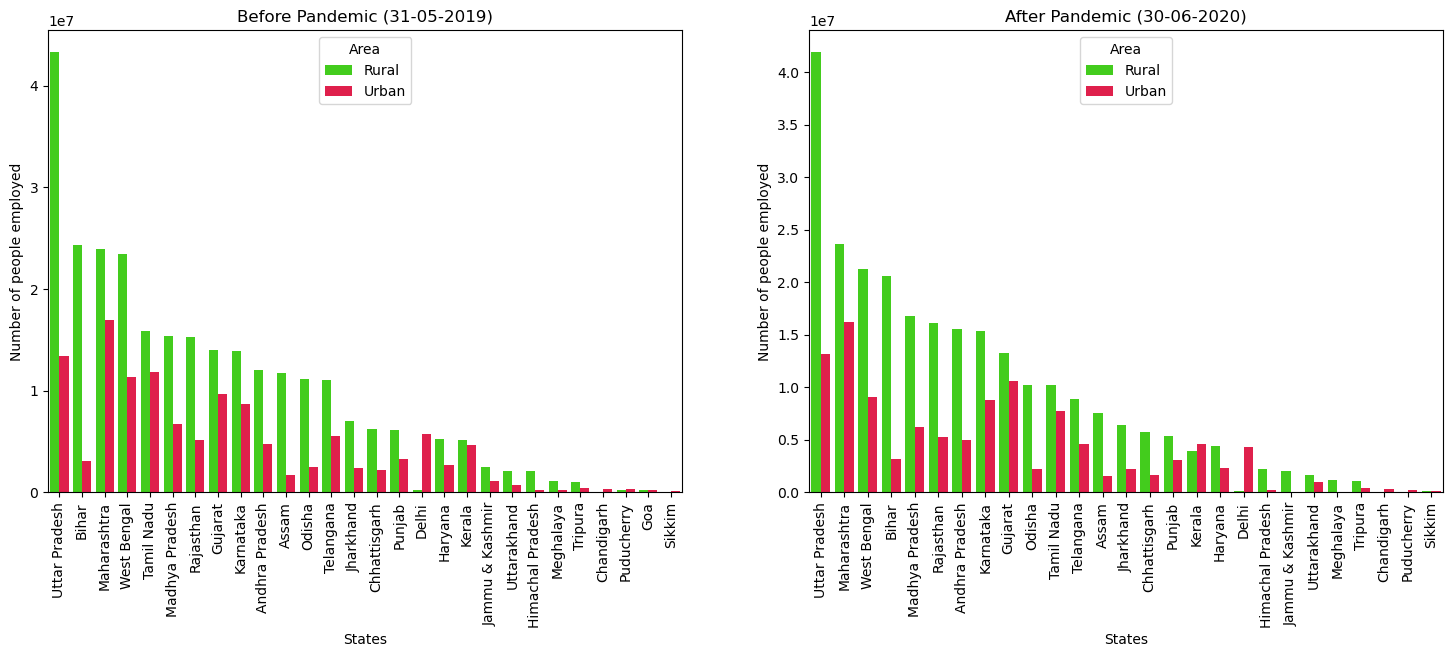

In [15]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.barplot(df_oldest['States'],df_oldest['Employed'], errwidth=0, hue=df_oldest['Area'], palette='prism')
plt.xlabel('States')
plt.ylabel('Number of people employed')
plt.xticks(rotation=90)
plt.title('Before Pandemic (31-05-2019)')

plt.subplot(1,2,2)
sns.barplot(df_latest['States'],df_latest['Employed'], errwidth=0, hue=df_latest['Area'], palette='prism')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Number of people employed')
plt.title('After Pandemic (30-06-2020)')

plt.show()

1. UP, Bihar and Maharashtra were top 3 states employing highest number of people before pandemic.
2. After pandemic, Bihar lost its position in top 3 states. It dropped from second rank to fourth rank.
3. Tamil Nadu seems the worst hit. It dropped from 5th position to 11th position.
4. Though UP has highest number of people employed, its most of the population is employed in rural sector. While Maharashtra leads in population employed in urban sector.

* ### Changes in number of people employed before and after pandemic - Areawise comparison

I will again create two dataframes - First, by taking rural data obtained in first (31-05-2019) and last (30-06-2020) observations and second, by considering urban data obtained in first and last observations. Then I will plot bar graphs to compare changes in number of people employed in rural and urban areas before and after pandemic.

In [16]:
# Number of people employed in rural sector
df_rural = df.query("Date ==' 31-05-2019' and Area == 'Rural' or Date ==' 30-06-2020' and Area == 'Rural' ").sort_values(by='Employed',ascending=False)
df_rural.head(3)

,States,Date,Unemployment_rate,Employed,Labour_participation_rate,Area
318,Uttar Pradesh,31-05-2019,10.26,43287808.0,39.96,Rural
331,Uttar Pradesh,30-06-2020,8.51,41908909.0,36.89,Rural
26,Bihar,31-05-2019,9.27,24322330.0,39.75,Rural


In [17]:
# Number of people employed in urban sector
df_urban = df.query("Date ==' 31-05-2019' and Area == 'Urban' or Date ==' 30-06-2020' and Area == 'Urban' ").sort_values(by='Employed',ascending=False)
df_urban.head(3)

,States,Date,Unemployment_rate,Employed,Labour_participation_rate,Area
575,Maharashtra,31-05-2019,6.08,16962574.0,38.30,Urban
588,Maharashtra,30-06-2020,10.01,16172690.0,37.04,Urban
712,Uttar Pradesh,31-05-2019,14.40,13391244.0,40.43,Urban


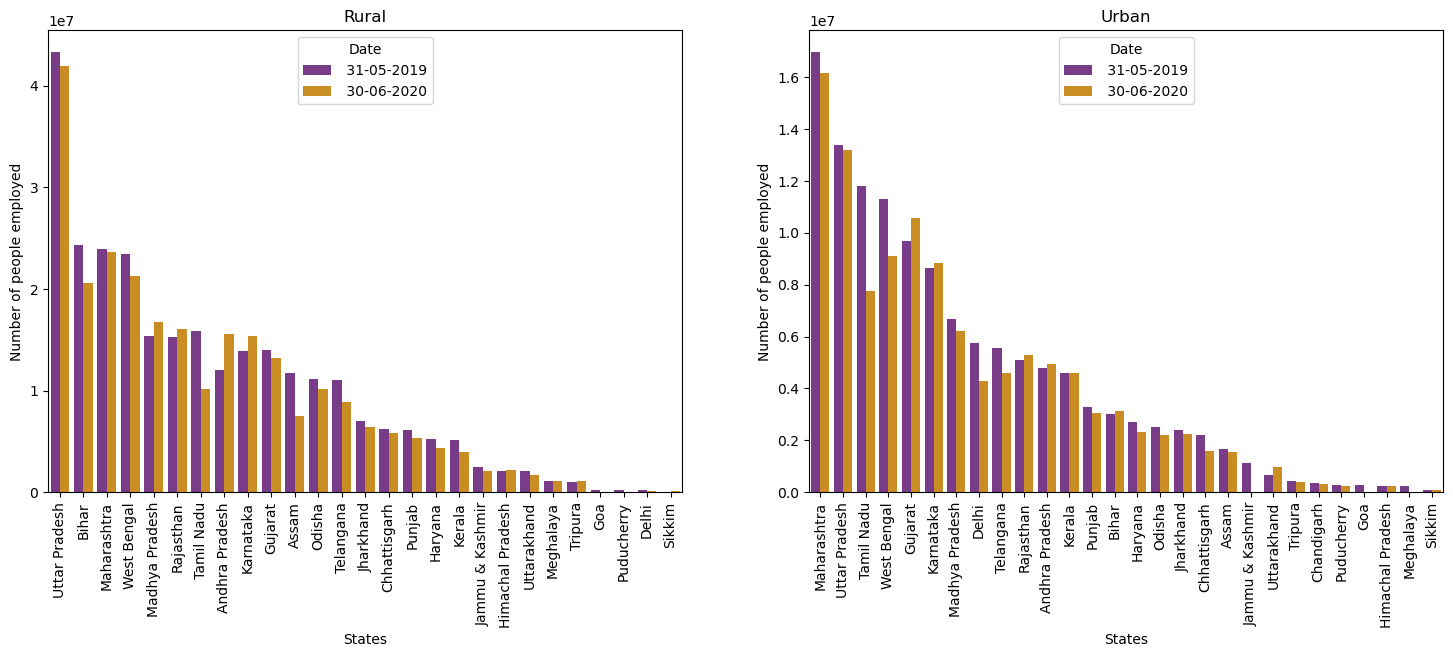

In [18]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.barplot(df_rural['States'],df_rural['Employed'], errwidth=0, hue=df_rural['Date'], palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Number of people employed')
plt.title('Rural')

plt.subplot(1,2,2)
sns.barplot(df_urban['States'],df_urban['Employed'], errwidth=0, hue=df_urban['Date'], palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Number of people employed')
plt.title('Urban')

plt.show()

1. Barring few states, number of people employed decreased in all the states after pandemic - in both rural as well as urban sector.
2. In MP, Rajasthan, Andhra Pradesh, Karnataka and Himachal Pradesh, the employed people in rural sector increased after pandemic.
3. In Gujarat, Karnataka, Rajasthan, Andhra Pradesh, Bihar and Uttarakhand, the employed people in urban sector increased after pandemic.

* ### Changes in employed people over time in top 5 states - UP, MH, BR, WB, TN

I will create separate dataframes grouped by states mentioned above and then observe the trend in number of employed people over time through line graph.

In [19]:
# Creating dataframes grouped by states
df_UP = df.query("States == 'Uttar Pradesh'")
df_MH = df.query("States == 'Maharashtra'")
df_BR = df.query("States == 'Bihar'")
df_WB = df.query("States == 'West Bengal'")
df_TN = df.query("States == 'Tamil Nadu'")

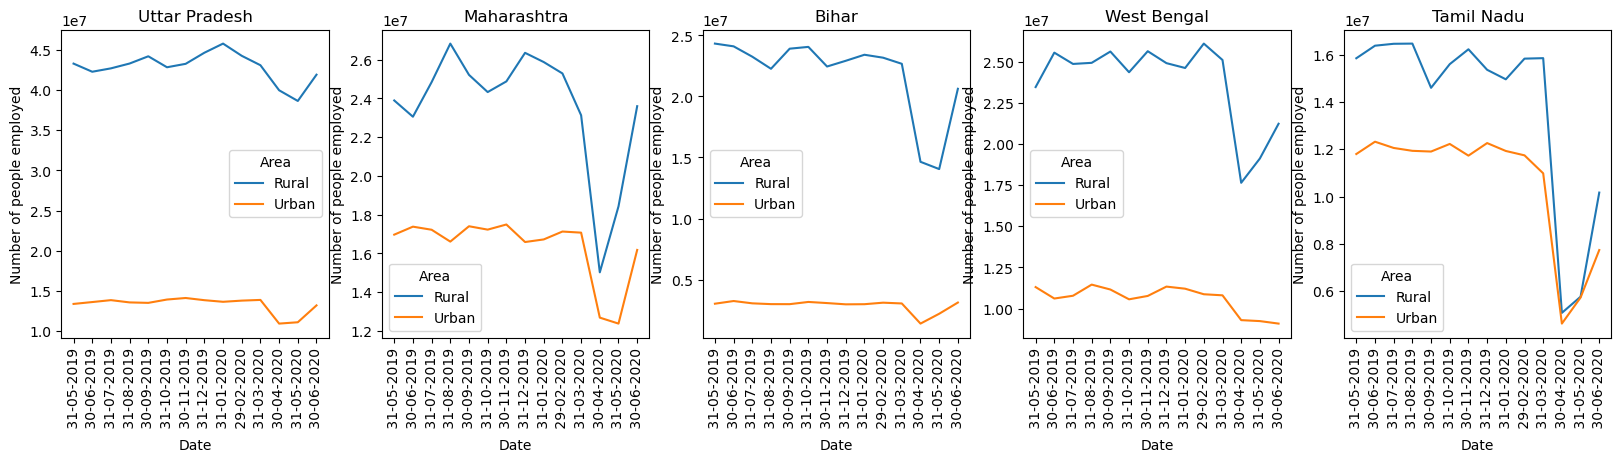

In [20]:
plt.figure(figsize=(20,4))

DF_List = [df_UP, df_MH, df_BR, df_WB, df_TN]
DF_Name = ['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal', 'Tamil Nadu']

for i in range(5): 
    plt.subplot(1,5,i+1)
    sns.lineplot('Date','Employed', data = DF_List[i], hue='Area')
    plt.xlabel('Date')
    plt.ylabel('Number of people employed')
    plt.title('{}'.format(DF_Name[i]))
    plt.xticks(rotation=90)
plt.show()

The count of employed people decreased after 30 March 2020 when lockdown was announced in wake of covid 19. This decrease was rapid in Maharashtra and Tamil Nadu.

## 2. Trends in unemployment rate

* ### Changes in unemployment rate before and after pandemic - Statewise comparison

As we have already created dataframes, let's use the same for comparing unemployment rates.

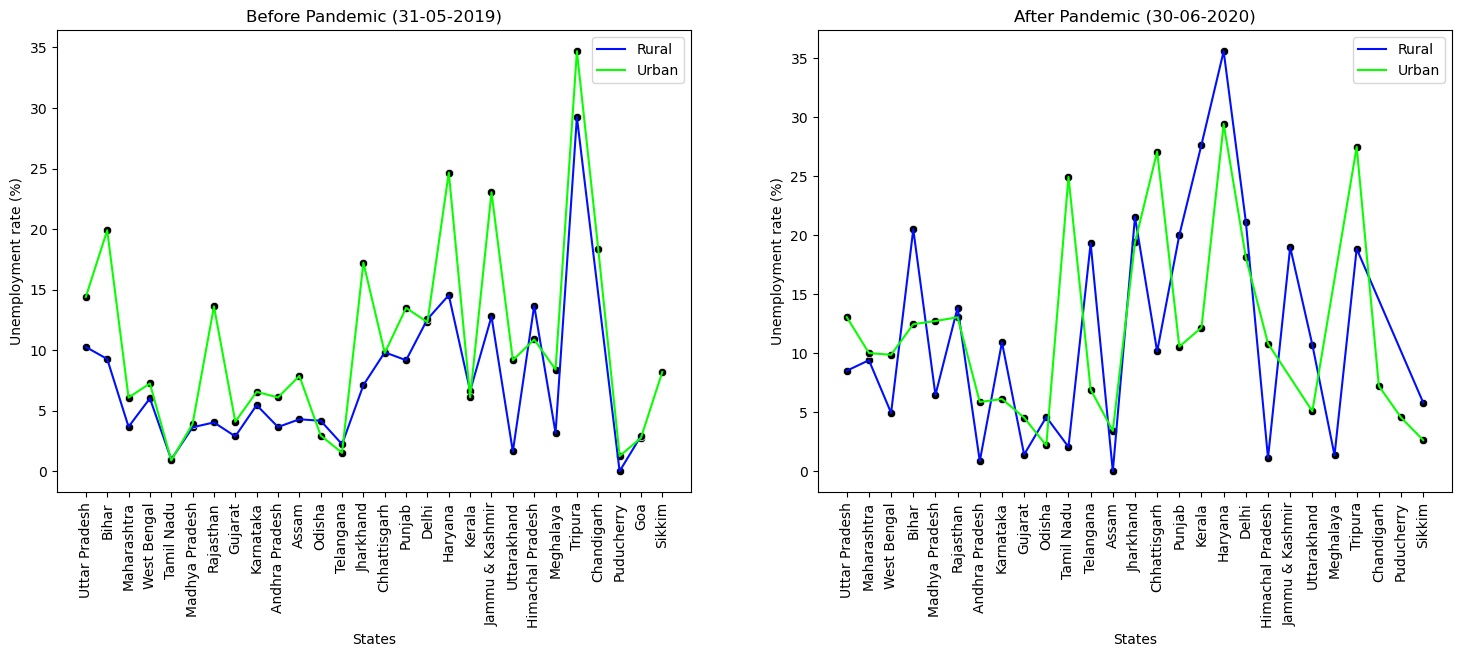

In [21]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.lineplot(df_oldest['States'],df_oldest['Unemployment_rate'], hue=df_oldest['Area'], palette='hsv_r')
sns.scatterplot(df_oldest['States'],df_oldest['Unemployment_rate'], color='black')
plt.xlabel('States')
plt.ylabel('Unemployment rate (%)')
plt.xticks(rotation=90)
plt.title('Before Pandemic (31-05-2019)')

plt.subplot(1,2,2)
sns.lineplot(df_latest['States'],df_latest['Unemployment_rate'], hue=df_latest['Area'], palette='hsv_r')
sns.scatterplot(df_latest['States'],df_latest['Unemployment_rate'], color='black')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Unemployment rate (%)')
plt.title('After Pandemic (30-06-2020)')

plt.show()

Unemployment rate for rural sector was less than urban sector before pandemic. But after pandemic rural unemployment rate also increased. Unemployment was highest (around 35%) is Tripura before pandemic and it is highest in Haryana after pandemic was hit.

* ### Changes in unemployment rate before and after pandemic - Areawise comparison

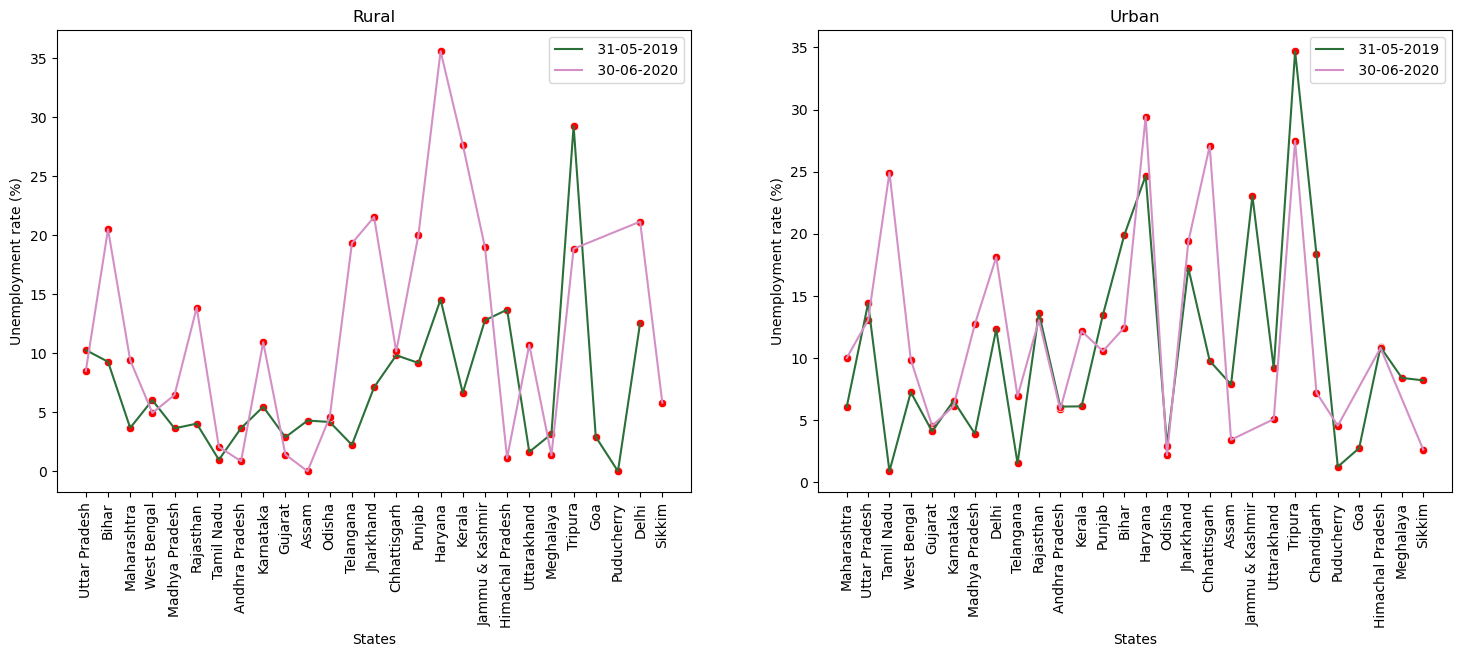

In [22]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.lineplot(df_rural['States'], df_rural['Unemployment_rate'], hue=df_rural['Date'], palette='cubehelix')
sns.scatterplot(df_rural['States'], df_rural['Unemployment_rate'], color='red')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Unemployment rate (%)')
plt.title('Rural')

plt.subplot(1,2,2)
sns.lineplot(df_urban['States'], df_urban['Unemployment_rate'], hue=df_urban['Date'], palette='cubehelix')
sns.scatterplot(df_urban['States'], df_urban['Unemployment_rate'], color='red')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Unemployment rate (%)')
plt.title('Urban')

plt.show()

In both sectors, unemployment was highest in Tripura before pandemic (31-05-2019) and highest in Haryana after pandemic (30-06-2020). It shows, Haryana and Tripura have chronic unemployment problem.

* ### Changes in unemployment rates over time in top 8 states - HR, TR, CG, DL, JH, TN, JK, TS

I will create separate dataframes grouped by states mentioned above and then observe the trend in unemployment rate over time through line graph.

In [23]:
# Creating dataframes grouped by states
df_HR = df.query("States == 'Haryana'")
df_TR = df.query("States == 'Tripura'")
df_CG = df.query("States == 'Chhattisgarh'")
df_DL = df.query("States == 'Delhi'")
df_JH = df.query("States == 'Jharkhand'")
df_TN = df.query("States == 'Tamil Nadu'")
df_JK = df.query("States == 'Jammu & Kashmir'")
df_TS = df.query("States == 'Telangana'")

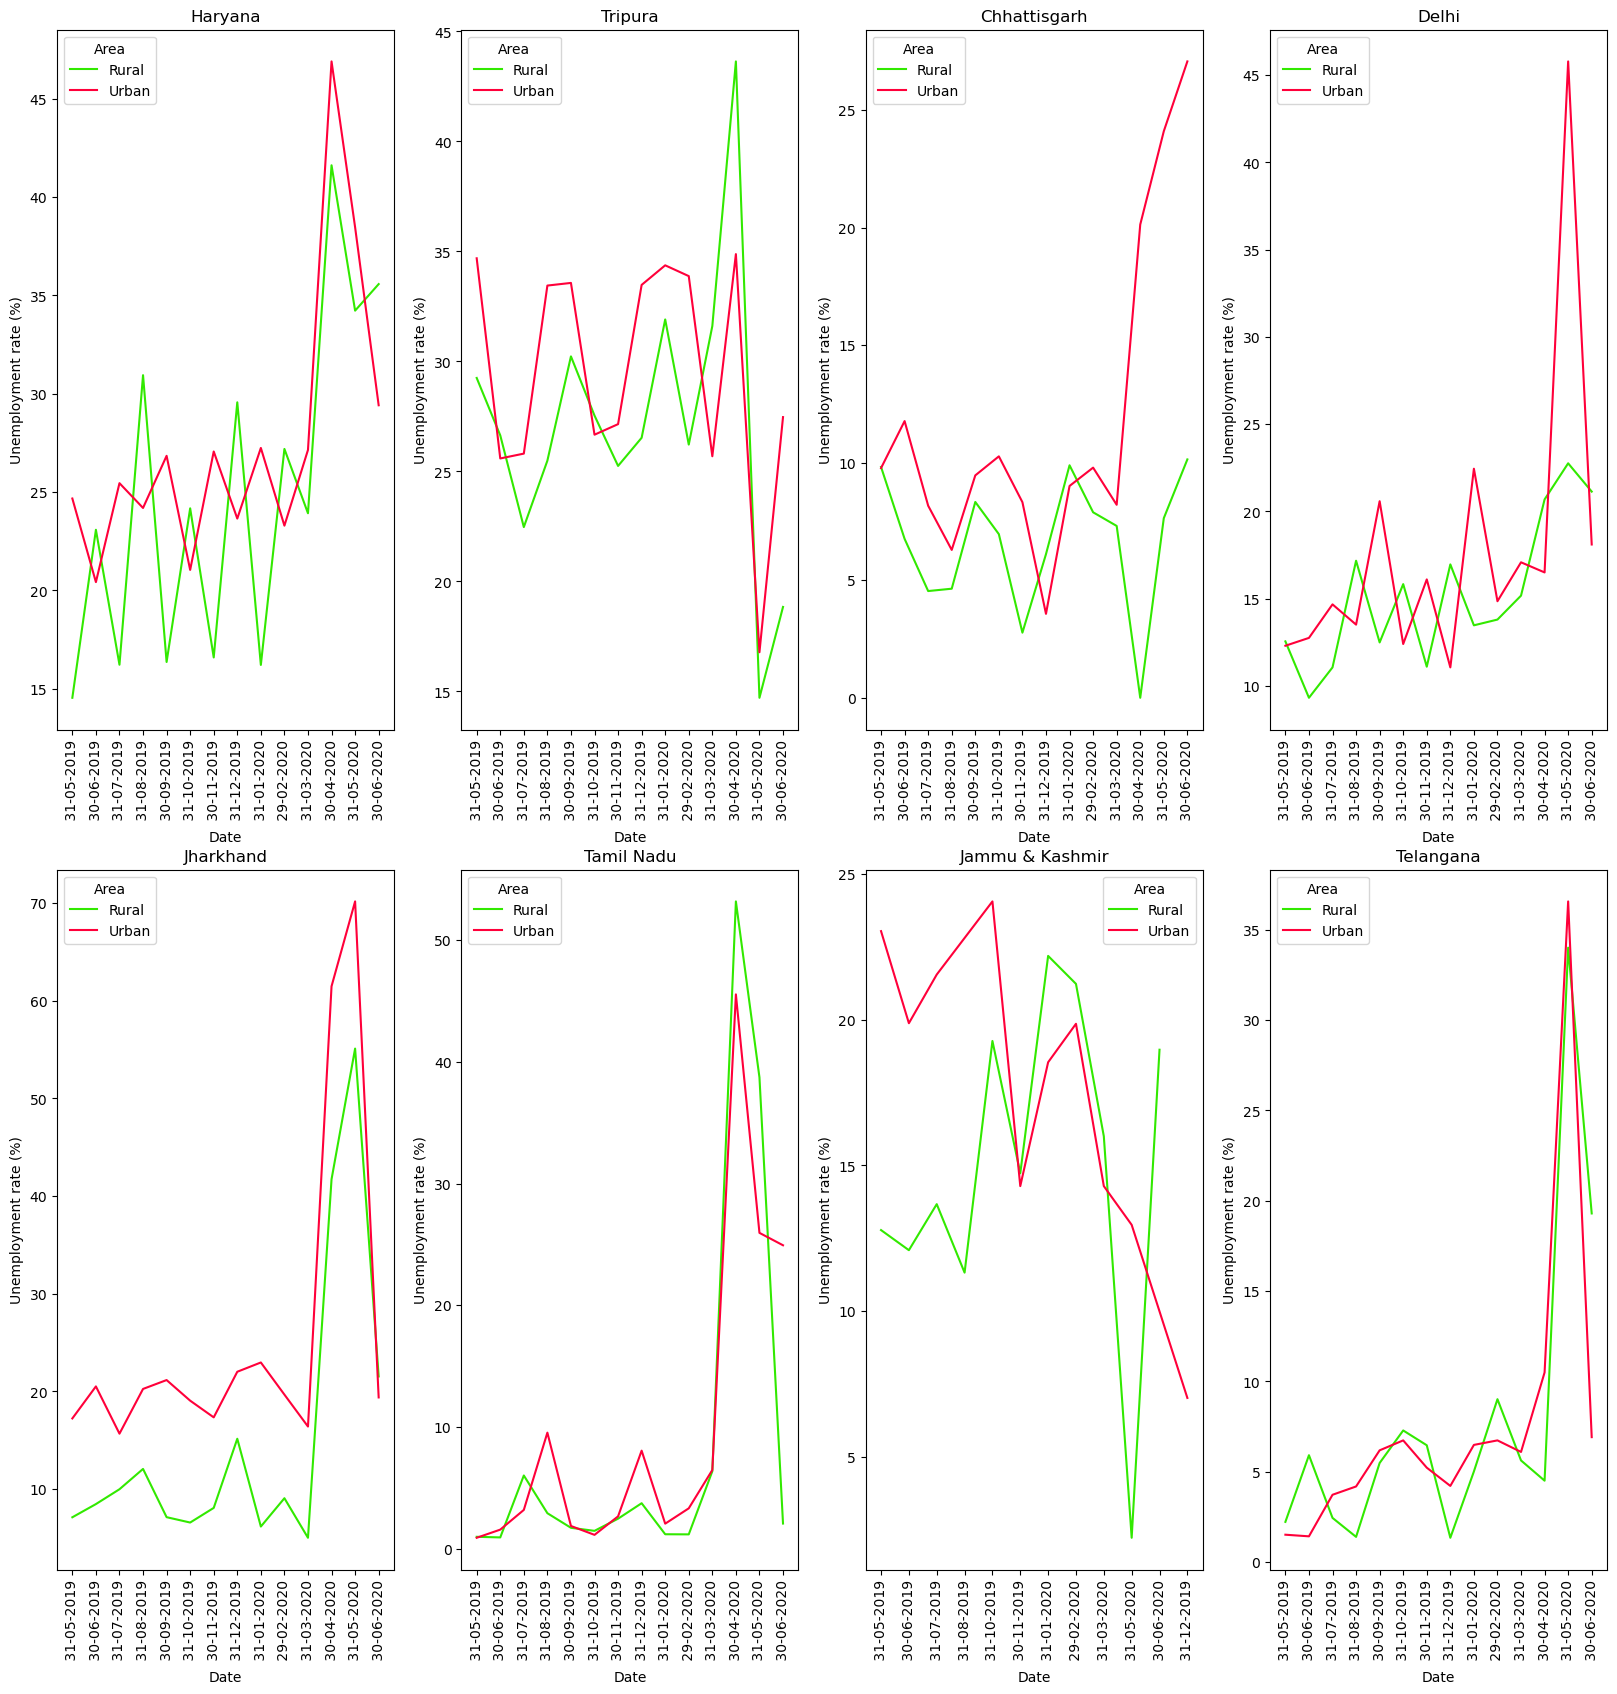

In [24]:
plt.figure(figsize=(20,20))

DF_list = [df_HR, df_TR, df_CG, df_DL, df_JH, df_TN, df_JK, df_TS]
DF_name = ['Haryana', 'Tripura', 'Chhattisgarh', 'Delhi', 'Jharkhand', 'Tamil Nadu', 'Jammu & Kashmir', 'Telangana']

for i in range(8): 
    plt.subplot(2,4,i+1)
    sns.lineplot('Date','Unemployment_rate', data = DF_list[i], hue='Area', palette='prism')
    plt.xlabel('Date')
    plt.ylabel('Unemployment rate (%)')
    plt.title('{}'.format(DF_name[i]))
    plt.xticks(rotation=90)
plt.show()

1. Except Jammu & Kashmir, unemployment rate increased drastically in all the states after March 2020 when lockdown was announced. 
2. A considerable change was observed in Jharkhand where urban unemployment rate went as high as 70%.
3. It is observed that urban unemployment is higher than rural unemployment.

## 3. Trends in Labour participation rate

* ### Changes in labour participation rate before and after pandemic - Statewise comparison

We have already created dataframes, let's use the same for comparing labour participation rates.

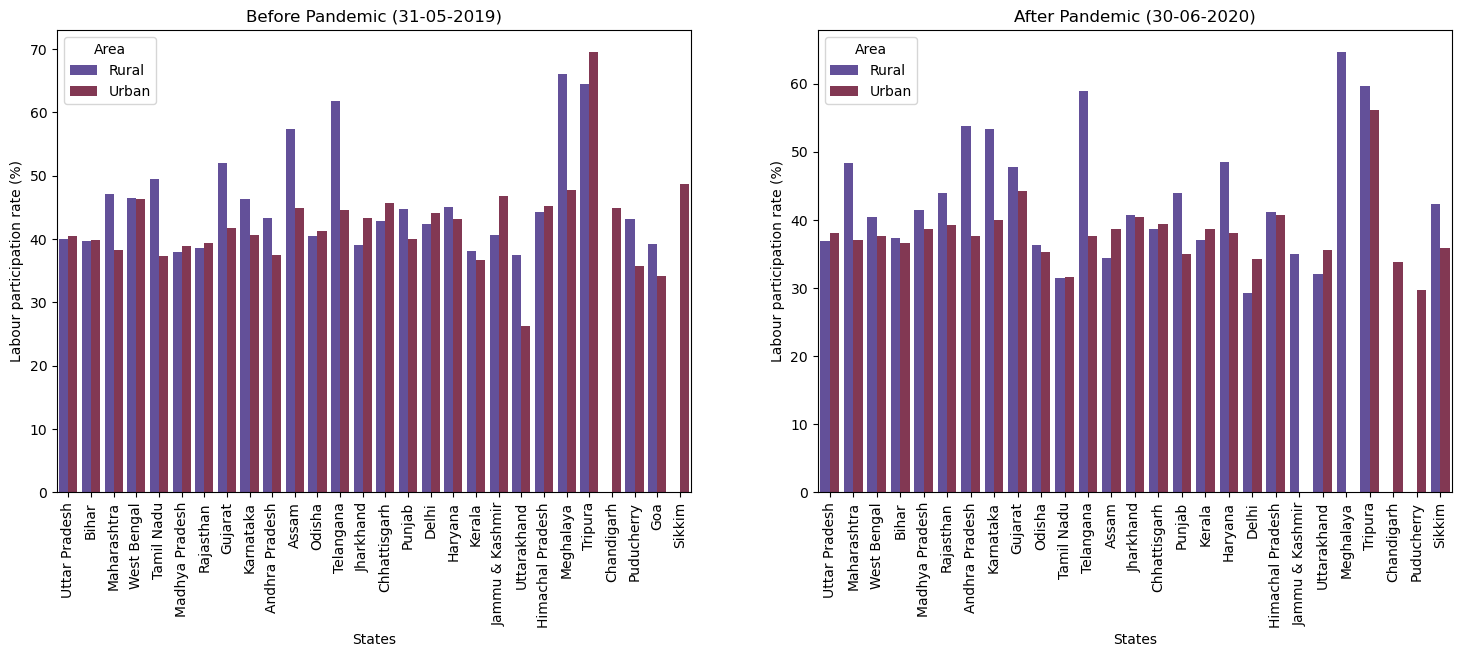

In [25]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.barplot(df_oldest['States'],df_oldest['Labour_participation_rate'], errwidth=0, hue=df_oldest['Area'], palette='twilight')
plt.xlabel('States')
plt.ylabel('Labour participation rate (%)')
plt.xticks(rotation=90)
plt.title('Before Pandemic (31-05-2019)')

plt.subplot(1,2,2)
sns.barplot(df_latest['States'],df_latest['Labour_participation_rate'], errwidth=0, hue=df_latest['Area'], palette='twilight')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Labour participation rate (%)')
plt.title('After Pandemic (30-06-2020)')

plt.show()

1. Maximum labour participation is seen in Tripura, before pandemic. This is the same state where highest unemployment was observed.
2. After pandemic, Meghalaya has highest labour force participation.

* ### Changes in unemployment rate before and after pandemic - Areawise comparison

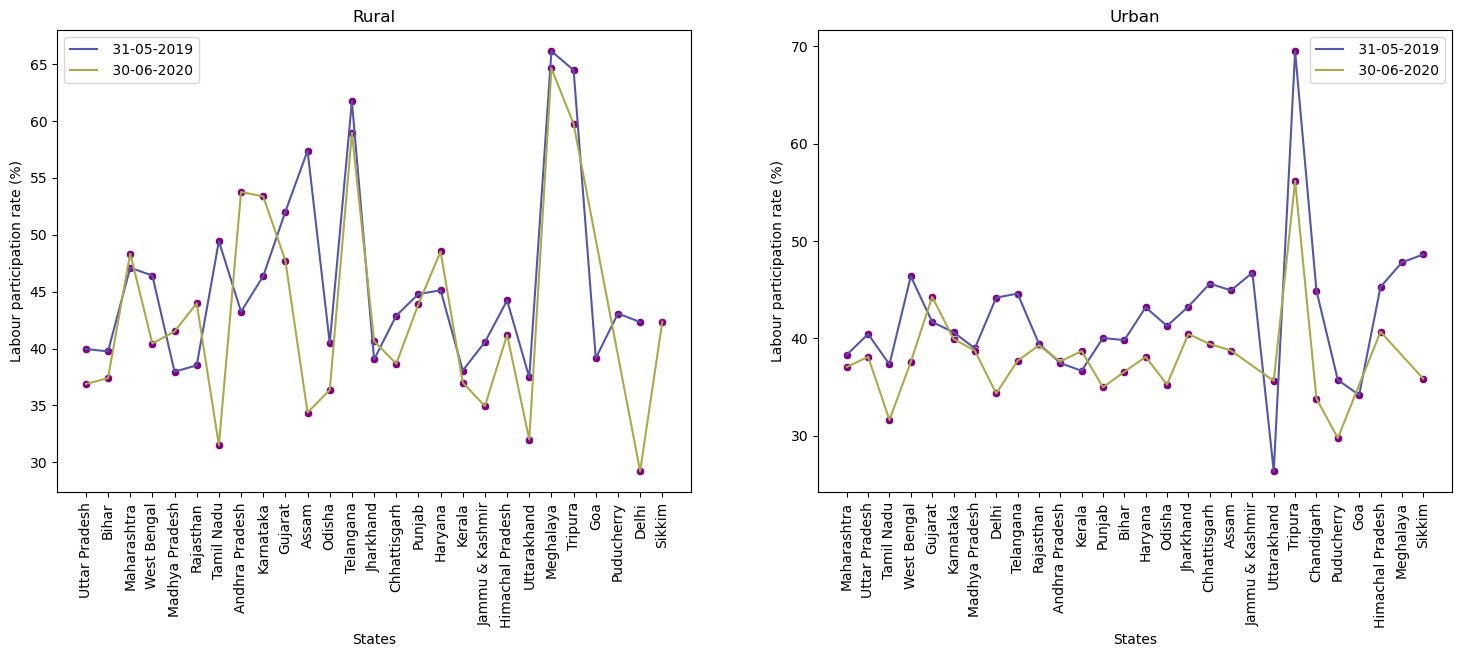

In [26]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.lineplot(df_rural['States'], df_rural['Labour_participation_rate'], hue=df_rural['Date'], palette='gist_stern')
sns.scatterplot(df_rural['States'], df_rural['Labour_participation_rate'], color='purple')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Labour participation rate (%)')
plt.title('Rural')

plt.subplot(1,2,2)
sns.lineplot(df_urban['States'], df_urban['Labour_participation_rate'], hue=df_urban['Date'], palette='gist_stern')
sns.scatterplot(df_urban['States'], df_urban['Labour_participation_rate'], color='purple')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Labour participation rate (%)')
plt.title('Urban')

plt.show()

1. Before pandemic, Tripura has highest labour participation in urban sector while Meghalaya has highest labour participation in rural sector.
2. After pandemic, labour participation decreased. But it was still highest in Tripura for Urban sector and highest in Meghalaya for rural sector.
3. Telangana and Assam have high labour participation rate in rural sector compared to urban.

* ### Changes in labour participation rates over time in top 4 states - TR, MG, TS, AS

I will create separate dataframes grouped by states mentioned above and then observe the trend in labour participation rate over time through line graph.

In [27]:
# Creating dataframes grouped by states
df_TR = df.query("States == 'Tripura'")
df_MG = df.query("States == 'Meghalaya'")
df_TS = df.query("States == 'Telangana'")
df_AS = df.query("States == 'Assam'")

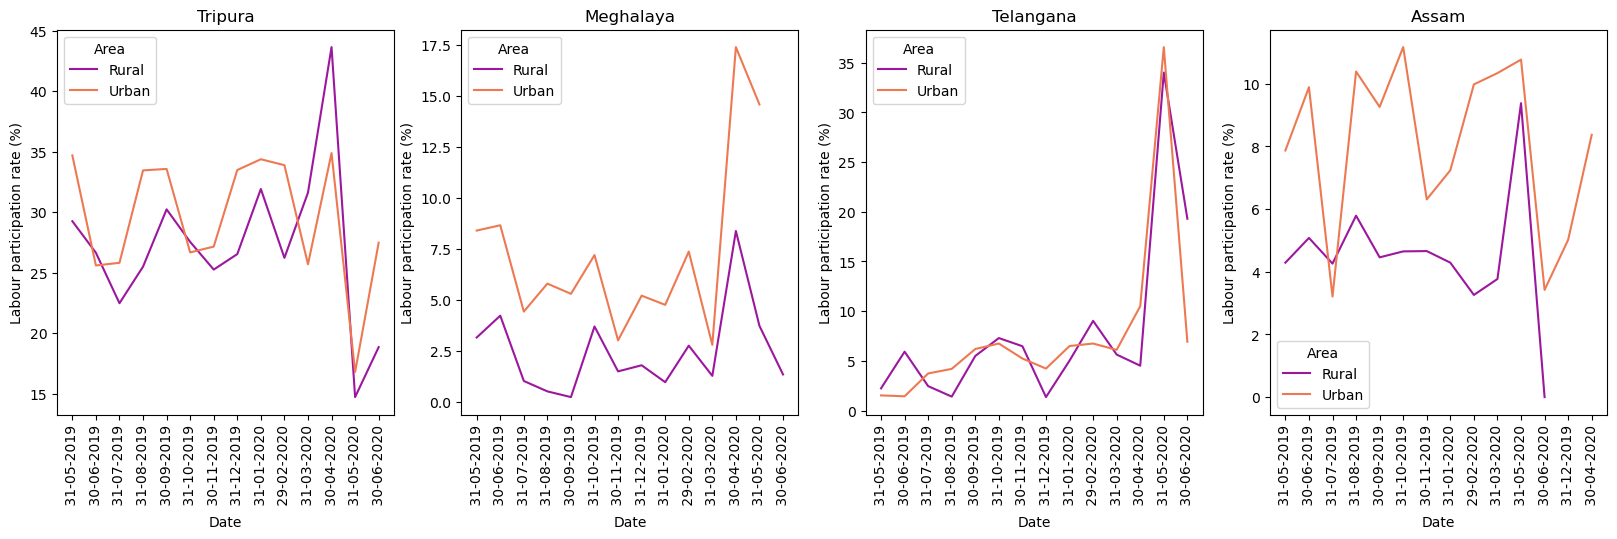

In [28]:
plt.figure(figsize=(20,5))

df_list = [df_TR, df_MG,df_TS, df_AS]
df_name = ['Tripura', 'Meghalaya', 'Telangana', 'Assam']

for i in range(4): 
    plt.subplot(1,4,i+1)
    sns.lineplot('Date','Unemployment_rate', data = df_list[i], hue='Area', palette='plasma')
    plt.xlabel('Date')
    plt.ylabel('Labour participation rate (%)')
    plt.title('{}'.format(df_name[i]))
    plt.xticks(rotation=90)
plt.show()

Labour force participation spiked in April 2020 and then suddenly decreased after lockdown was announced in March 2020. Maximum decrease was observed in Assam and Tripura and that too in Urban sector.

## Conclusion:
Uttar Pradesh and Maharashtra are most preferred employment destinations. Unemployment in urban sector is unstable while that of in rural sector is relatively stable. After pandemic, both rural and urban unemployment increased drastically. State of Tripura has high labour force participation but high unemployment rate as well. It is necessary to generate employment opportunities in Tripura. Tamil Nadu was the worst hit by the pandemic in terms of employment opportunities.